In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk

1.Download Dataset

2.Load Dataset

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3.Performing Visualization

Univariate Analysis

In [4]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


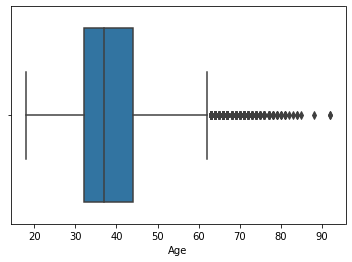

In [5]:
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


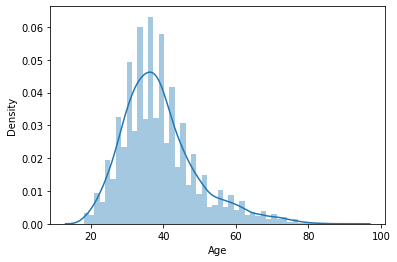

In [6]:
sns.distplot(data['Age'])

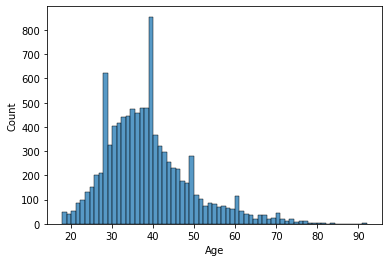

In [7]:
sns.histplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


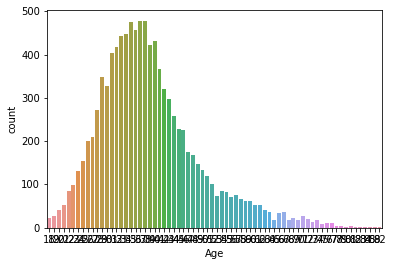

In [8]:
sns.countplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


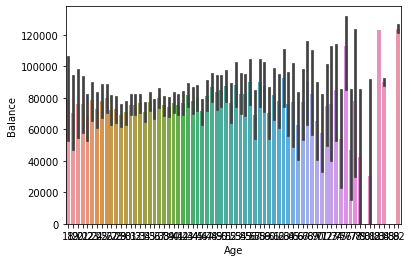

In [9]:
sns.barplot(data['Age'],data['Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


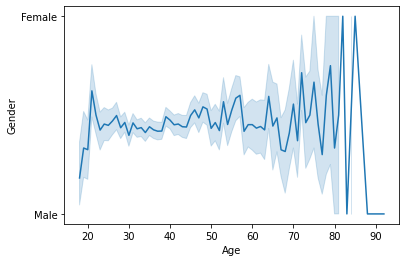

In [10]:
sns.lineplot(data['Age'],data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


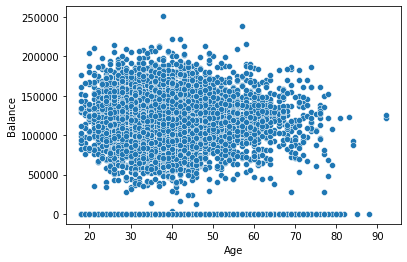

In [11]:
sns.scatterplot(data['Age'],data['Balance'])


In [12]:
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


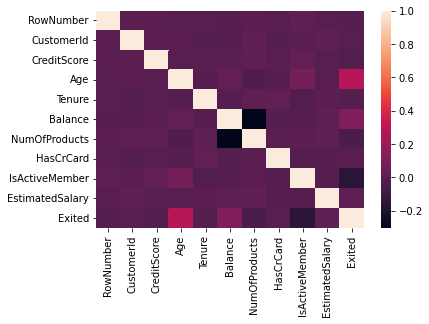

In [13]:
sns.heatmap(data.corr())

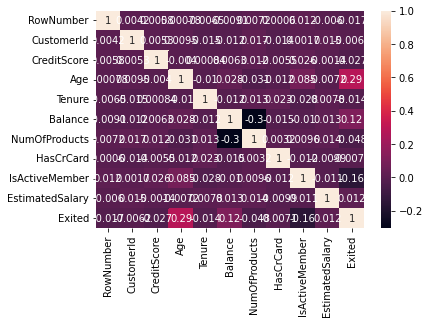

In [14]:
sns.heatmap(data.corr(),annot=True)

4.Performing Descriptive Satistics

In [15]:
df=pd.DataFrame(data)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


5.Handle the Missing Value

In [18]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

6.Find and Replace Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


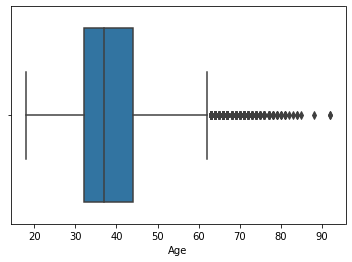

In [19]:
sns.boxplot(data['Age'])

In [20]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [21]:
data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [22]:
q=data.quantile(q=[0.75,0.5])

In [23]:
iqr=q.iloc[0]-q.iloc[1]

In [24]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [25]:
l=q.iloc[1]-(1.5*iqr)

In [26]:
l['Age']

26.5

In [27]:
u=q.iloc[1]+(1.5*iqr)

In [28]:
u['Age']

47.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


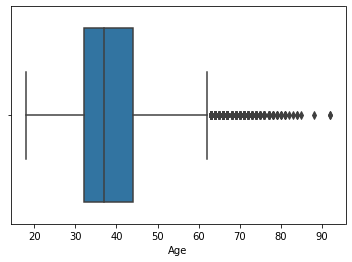

In [29]:
sns.boxplot(data['Age'])

In [30]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


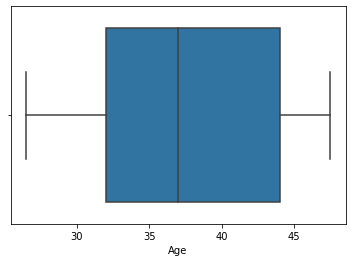

In [31]:
sns.boxplot(data['Age'])

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
data['Surname']=le.fit_transform(data['Surname'])
data['Geography']=le.fit_transform(data['Geography'])
data['Gender']=le.fit_transform(data['Gender'])

In [35]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [36]:
y=data['Exited']
x=data.drop(columns=['Exited'],axis=1)

In [37]:
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39.0,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,1,35.0,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,0,36.0,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,1,42.0,3,75075.31,2,1,0,92888.52


In [38]:
from sklearn.preprocessing import scale

In [39]:
names=x.columns

In [40]:
x=scale(x)

In [41]:
x

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [42]:
x=pd.DataFrame(x,columns=names)

In [43]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.731878,-0.783213,-0.464183,-0.326221,-0.901886,-1.095988,0.634377,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-1.731531,-0.606534,-0.390911,-0.440036,1.515067,-1.095988,0.491249,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.731185,-0.995885,0.628988,-1.536794,-0.901886,-1.095988,0.634377,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,-1.730838,0.144767,-1.440356,0.501521,-0.901886,-1.095988,0.204994,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-1.730492,0.652659,0.371354,2.063884,1.515067,-1.095988,0.777504,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9644,1.608902,0.521870,-0.259731,-2.054133,-0.901886,-1.095988,-0.367516,1.032908,-1.225848,0.807737,0.646092,0.970243,0.861183
6659,0.574868,-1.476265,-0.305821,0.180771,0.306591,0.912419,0.204994,-0.350204,0.054654,-0.911583,0.646092,-1.030670,-1.071577
5442,0.153286,-0.424336,-0.032824,-0.388302,0.306591,-1.095988,0.777504,1.724464,0.705125,-0.911583,-1.547768,-1.030670,-0.090687
5178,0.061834,1.444525,-1.748807,2.063884,0.306591,0.912419,-1.584099,0.687130,0.241604,0.807737,-1.547768,-1.030670,-1.557165
7653,0.919199,1.352300,-0.328275,-1.195351,1.515067,-1.095988,-1.083153,-0.004426,0.744281,-0.911583,-1.547768,-1.030670,-0.655559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840,1.676798,-1.154742,0.158629,-0.771133,1.515067,0.912419,-1.584099,1.032908,-1.225848,0.807737,-1.547768,0.970243,-1.147486
9411,1.528188,1.462125,-0.700545,0.398053,0.306591,-1.095988,0.348122,-0.350204,0.026183,4.246377,0.646092,-1.030670,0.333331
9944,1.712825,0.180481,-1.313902,0.967126,0.306591,0.912419,0.491249,0.687130,1.825864,0.807737,0.646092,0.970243,0.665499
863,-1.432926,-1.066632,0.597079,0.687763,-0.901886,0.912419,1.421578,0.341352,-1.225848,0.807737,-1.547768,0.970243,-0.043044


In [47]:
x_train.shape

(8000, 13)

In [48]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1117,-1.344937,-1.367358,-1.079905,0.832617,-0.901886,-1.095988,1.350014,-1.387538,0.623908,2.527057,-1.547768,-1.030670,1.593605
1653,-1.159262,-0.802245,0.277991,-1.557488,-0.901886,0.912419,1.421578,-1.387538,0.382867,-0.911583,0.646092,-1.030670,0.319967
6420,0.492076,0.376720,-0.752544,-0.460730,0.306591,-1.095988,1.350014,-1.733315,0.972081,0.807737,-1.547768,0.970243,-0.805215
2293,-0.937559,1.533720,1.261255,0.398053,1.515067,-1.095988,1.063759,-1.733315,-0.299734,-0.911583,0.646092,-1.030670,1.699145
8975,1.377154,1.007533,-0.539819,-0.864254,0.306591,0.912419,0.491249,-1.733315,0.927857,-0.911583,0.646092,0.970243,0.098364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,-0.811466,0.651185,-1.409629,-0.915988,-0.901886,0.912419,-1.226280,1.378686,-1.225848,-0.911583,0.646092,0.970243,-1.290813
2620,-0.824283,-0.078415,0.328809,-0.491770,-0.901886,0.912419,-0.367516,0.341352,0.841549,0.807737,0.646092,-1.030670,0.528509
620,-1.517103,-0.116158,-0.509092,-0.595238,-0.901886,0.912419,-0.367516,1.378686,0.604340,-0.911583,0.646092,-1.030670,-0.503171
6770,0.613319,1.728763,-0.206549,0.118690,-0.901886,-1.095988,0.061867,-1.041760,0.320445,-0.911583,0.646092,-1.030670,0.350722


In [49]:
x_test.shape

(2000, 13)

In [50]:
y_train

9644    0
6659    0
5442    1
5178    0
7653    1
       ..
9840    0
9411    1
9944    0
863     0
5814    0
Name: Exited, Length: 8000, dtype: int64

In [51]:
y_train.shape


(8000,)

In [52]:
y_test

1117    1
1653    1
6420    0
2293    1
8975    0
       ..
2657    0
2620    0
620     0
6770    0
1398    1
Name: Exited, Length: 2000, dtype: int64

In [53]:
y_test.shape

(2000,)